# Autoencode me

Let's use a different architecture, an autoencoder!

We will use the functional API to define the autoencoder!

In [52]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the model layers
ae_input = Input(shape=(784,))
encoder_1 = Dense(256, activation='relu')(ae_input)
encoder_2 = Dense(32, activation='relu')(encoder_1)

decoder_2 = Dense(32, activation='relu')(encoder_2)
decoder_1 = Dense(256, activation='relu')(decoder_2)
ae_output = Dense(784, activation='sigmoid')(decoder_1)

# Define the autoencoder and encoder models
autoencoder = Model(ae_input, ae_output)
encoder = Model(ae_input, encoder_2)



Build the model and a get a handler to extract the hidden representation (encoded_2). Note that the weights are shared between the two models!

In [53]:
from tensorflow.keras.optimizers import Adam
# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')


Get the data (as usual):

In [54]:
from tensorflow.keras.datasets import mnist

# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)) / 255.0
x_test = x_test.reshape((-1, 28 * 28)) / 255.0


Train the autoencoder!

In [55]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
235/235 - 2s - 7ms/step - loss: 0.2232
Epoch 2/50
235/235 - 1s - 2ms/step - loss: 0.1337
Epoch 3/50
235/235 - 1s - 2ms/step - loss: 0.1166
Epoch 4/50
235/235 - 1s - 2ms/step - loss: 0.1083
Epoch 5/50
235/235 - 1s - 2ms/step - loss: 0.1040
Epoch 6/50
235/235 - 1s - 2ms/step - loss: 0.1010
Epoch 7/50
235/235 - 1s - 2ms/step - loss: 0.0985
Epoch 8/50
235/235 - 1s - 2ms/step - loss: 0.0967
Epoch 9/50
235/235 - 1s - 2ms/step - loss: 0.0950
Epoch 10/50
235/235 - 1s - 2ms/step - loss: 0.0937
Epoch 11/50
235/235 - 1s - 2ms/step - loss: 0.0925
Epoch 12/50
235/235 - 1s - 2ms/step - loss: 0.0914
Epoch 13/50
235/235 - 1s - 2ms/step - loss: 0.0905
Epoch 14/50
235/235 - 1s - 2ms/step - loss: 0.0896
Epoch 15/50
235/235 - 1s - 2ms/step - loss: 0.0889
Epoch 16/50
235/235 - 1s - 2ms/step - loss: 0.0882
Epoch 17/50
235/235 - 1s - 2ms/step - loss: 0.0877
Epoch 18/50
235/235 - 1s - 2ms/step - loss: 0.0871
Epoch 19/50
235/235 - 1s - 2ms/step - loss: 0.0865
Epoch 20/50
235/235 - 1s - 2ms/step - lo

Let's evaluate the model by reconstructing some images!

In [56]:
# Use the autoencoder to reconstruct images
original_images = x_test[:10]
reconstructed_images = autoencoder.predict(original_images).reshape((-1, 28, 28))
original_images = original_images.reshape((-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Original Images:


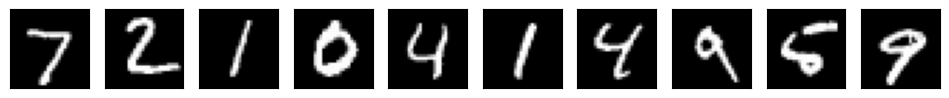

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Original Images:")
plt.figure(1, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Reconstructed Images:


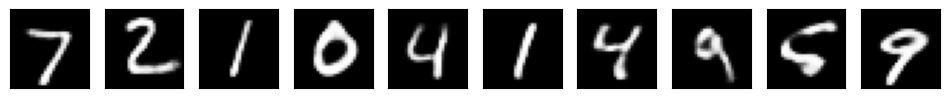

In [58]:
print("Reconstructed Images:")
plt.figure(2, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Pretty impressive, given that we compressed the data into just 32 dimensions (compression rate > 24). Note that the model performs a kind of smoothing/denoising.

We can further improve the "denoising" abilities of the model by adding noise during the training!

In [59]:
autoencoder.fit(x_train + 0.4*np.random.randn(x_train.shape[0], 784), x_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
235/235 - 1s - 3ms/step - loss: 0.1255
Epoch 2/50
235/235 - 1s - 2ms/step - loss: 0.1093
Epoch 3/50
235/235 - 1s - 2ms/step - loss: 0.1062
Epoch 4/50
235/235 - 1s - 2ms/step - loss: 0.1045
Epoch 5/50
235/235 - 1s - 2ms/step - loss: 0.1033
Epoch 6/50
235/235 - 1s - 2ms/step - loss: 0.1023
Epoch 7/50
235/235 - 1s - 2ms/step - loss: 0.1016
Epoch 8/50
235/235 - 1s - 2ms/step - loss: 0.1010
Epoch 9/50
235/235 - 1s - 3ms/step - loss: 0.1005
Epoch 10/50
235/235 - 1s - 3ms/step - loss: 0.1000
Epoch 11/50
235/235 - 1s - 3ms/step - loss: 0.0996
Epoch 12/50
235/235 - 1s - 3ms/step - loss: 0.0993
Epoch 13/50
235/235 - 1s - 3ms/step - loss: 0.0989
Epoch 14/50
235/235 - 1s - 3ms/step - loss: 0.0987
Epoch 15/50
235/235 - 1s - 3ms/step - loss: 0.0984
Epoch 16/50
235/235 - 1s - 3ms/step - loss: 0.0981
Epoch 17/50
235/235 - 1s - 3ms/step - loss: 0.0979
Epoch 18/50
235/235 - 1s - 3ms/step - loss: 0.0977
Epoch 19/50
235/235 - 1s - 3ms/step - loss: 0.0974
Epoch 20/50
235/235 - 1s - 3ms/step - lo

Let's reconstruct some noisy images!

In [60]:
original_images = x_test[:10] + 0.4*np.random.randn(10, 784)
reconstructed_images = autoencoder.predict(original_images).reshape((-1, 28, 28))
original_images = original_images.reshape((-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Noisy Images:


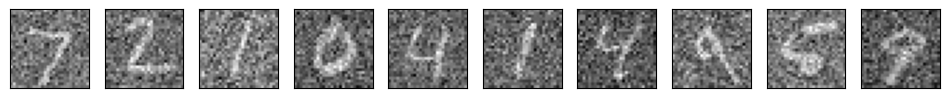

In [61]:
print("Noisy Images:")
plt.figure(1, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Reconstructed Images:


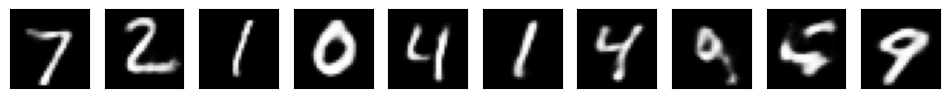

In [62]:
print("Reconstructed Images:")
plt.figure(2, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

We can use the same approach for any dataset!

In [63]:
from chelo.datasets import AmesMutagenicityDataset

dataset = AmesMutagenicityDataset()
dataset.load_data()
X, y = dataset.to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

(5764, 8)


In [64]:
# Define the model layers
ae_input = Input(shape=(8,))
encoder_1 = Dense(16, activation='relu')(ae_input)
encoder_2 = Dense(4, activation='relu')(encoder_1)

decoder_2 = Dense(4, activation='relu')(encoder_2)
decoder_1 = Dense(16, activation='relu')(decoder_2)
ae_output = Dense(8, activation=None)(decoder_1)

# Define the autoencoder and encoder models
autoencoder = Model(ae_input, ae_output)
encoder = Model(ae_input, encoder_2)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')



In [65]:
autoencoder.fit(X, X, epochs=200, batch_size=256, verbose=0)


In [66]:
original_data = X[:10]
reconstructed_data = autoencoder.predict(X[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [67]:
for x, x_r in zip(original_data, reconstructed_data):
    print(f"Original Data = \t \t {x}")
    print(f"Reconstructed Data = \t {x_r}")
    print(f"Error = \t {np.mean(np.abs(x_r-x))}")
     

Original Data = 	 	 [-0.8207913  -0.30394896 -0.24686341 -0.87527683  0.67041925 -0.7292805
 -0.7199414  -0.17404176]
Reconstructed Data = 	 [-0.71286    -0.3247209  -0.40230447 -0.74408174  0.7247899  -0.6949026
 -0.7386465  -0.35959315]
Error = 	 0.08854305859409257
Original Data = 	 	 [-0.8207913  -0.93144046  0.35745018 -0.89468676  0.67041925 -0.7345701
 -0.88733148 -0.72655468]
Reconstructed Data = 	 [-0.6862377  -0.9719021   0.19438615 -0.83304775  0.7037999  -0.6825902
 -0.8282729  -0.90961975]
Error = 	 0.09090031058638062
Original Data = 	 	 [-0.8207913  -0.26097723  0.22297763 -0.98392824  0.67041925 -0.73656663
 -0.87885428 -0.66290635]
Reconstructed Data = 	 [-0.69475174 -0.3046506   0.00287682 -0.8316319   0.708028   -0.7460494
 -0.79299116 -0.8818279 ]
Error = 	 0.11174828649163744
Original Data = 	 	 [-0.67998721 -0.4909808  -0.24686341 -0.62774832  0.53062206 -0.69432055
 -0.21615155 -0.04947878]
Reconstructed Data = 	 [-0.56205094 -0.4051085  -0.3047582  -0.55666244  